In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
wordnet_lemmatizer = WordNetLemmatizer()

In [3]:
train = pd.read_csv('./Data/train.csv', encoding='latin1')
test = pd.read_csv('./Data/test.csv', encoding='latin1')
df = pd.merge(train, test, on=['text', 'sentiment'], how='outer')

### Exploratory Data Analysis (EDA)

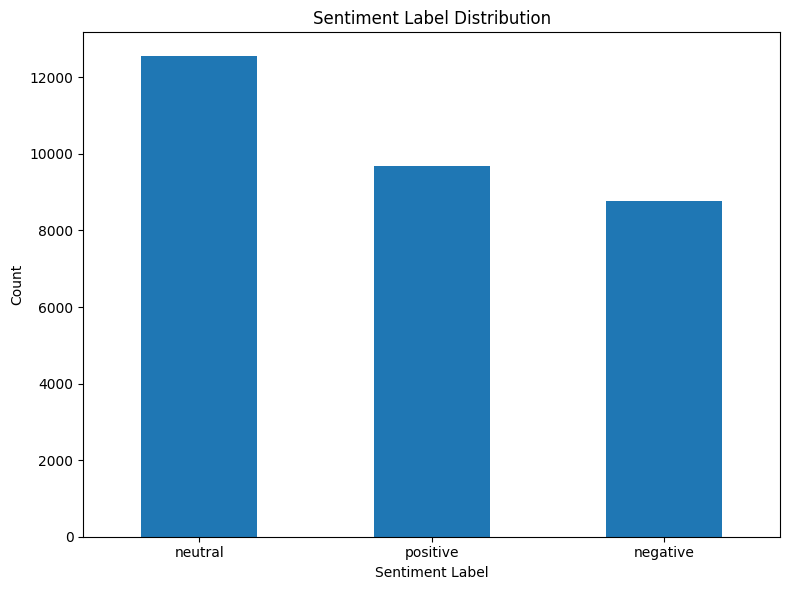

In [4]:
plt.figure(figsize=(8,6))
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()  
plt.show()

In [5]:
def normalizer(tweet):
      only_letters = re.sub("[^a-zA-Z]", " ", tweet)
      only_letters = only_letters.lower()
      only_letters = only_letters.split()
      filtered_result = [word for word in only_letters if word not in stopwords.words('english')]
      lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
      lemmas = ' '.join(lemmas)
      return lemmas

In [6]:
df.dropna(subset= ['text', 'sentiment'], inplace=True)
df.info()
y = df['sentiment']
x = df.text.apply(normalizer)

In [7]:
df.describe()

,Population -2020_x,Land Area (Km²),Density (P/Km²),Population -2020_y,Land Area (Kmï¿½),Density (P/Kmï¿½)
count,2.748000e+04,2.748000e+04,27480.000000,3.534000e+03,3.534000e+03,3534.000000
mean,4.018634e+07,6.621672e+05,357.699491,3.941891e+07,6.722499e+05,348.894171
std,1.504972e+08,1.807457e+06,2013.786207,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000,1.439324e+09,1.637687e+07,26337.000000


##### WordCloud Plot

In [1]:
from wordcloud import WordCloud

In [11]:
positive_df = df[df['sentiment']=='positive']
negative_df = df[df['sentiment']=='negative']
neutral_df = df[df['sentiment']=='neutral']

In [26]:
# Converting texts of each class to a string 

positive_df_string = ' '.join(positive_df['text'].tolist())
negative_df_string = ' '.join(negative_df['text'].tolist())
neutral_df_string = ' '.join(neutral_df['text'].tolist())

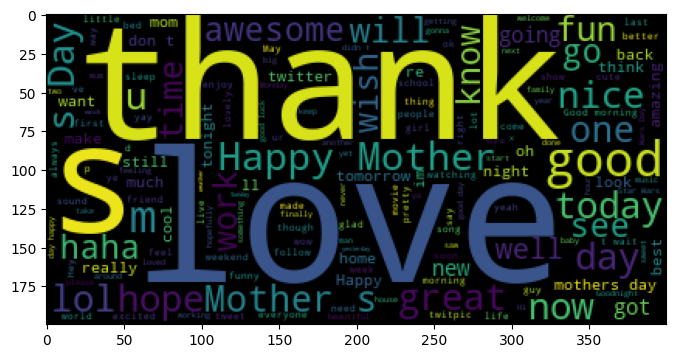

In [23]:
# Positive text wordcloud

plt.figure(figsize=(8,6))
plt.imshow(WordCloud().generate(positive_df_string))

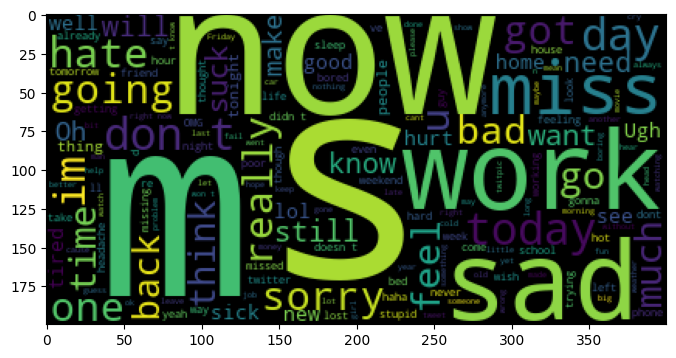

In [24]:
# Negative text wordcloud

plt.figure(figsize=(8,6))
plt.imshow(WordCloud().generate(negative_df_string))

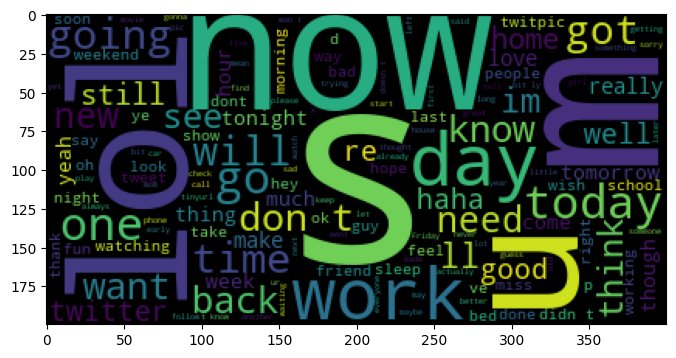

In [27]:
# Neutral text wordcloud

plt.figure(figsize=(8,6))
plt.imshow(WordCloud().generate(neutral_df_string))

In [11]:
vectorizer = CountVectorizer()
x_vectorized = vectorizer.fit_transform(x)

In [19]:
train_x,val_x,train_y,val_y = train_test_split(x_vectorized,y)

In [29]:
regressor = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model_LogisticRegression = regressor.fit(train_x, train_y)

c:\Users\perfe\OneDrive\Desktop\Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [32]:
from sklearn.naive_bayes import MultinomialNB
model_MultinomialNB = MultinomialNB().fit(train_x, train_y)

In [33]:
from sklearn.svm import SVC
model_SVC = SVC().fit(train_x, train_y)

In [34]:
y_pred = model_SVC.predict(val_x)

_f1 = f1_score(val_y, y_pred, average='micro')
_confusion = confusion_matrix(val_y, y_pred)
__precision = precision_score(val_y, y_pred, average='micro')
_recall = recall_score(val_y, y_pred, average='micro')
_statistics = {'f1_score': _f1,
               'confusion_matrix': _confusion,
               'precision': __precision,
               'recall': _recall
              }

In [35]:
print(_statistics)

{'f1_score': np.float64(0.6890637090533918), 'confusion_matrix': array([[1162,  962,  121],
       [ 269, 2542,  309],
       [  55,  695, 1639]]), 'precision': np.float64(0.6890637090533918), 'recall': np.float64(0.6890637090533918)}


In [27]:
import joblib

In [43]:
jlb = {
         'vectorizer': vectorizer,
         'LogisticRegression': model_LogisticRegression,
         'MultinomialNB': model_MultinomialNB,
         'SVM': model_SVC
         }
joblib.dump(jlb, 'sentiment_model.pkl')

['sentiment_model.pkl']